# <center>Image Processing Project</center>

- Sinh viên: Phan Thanh An
- Mã số sinh viên: 21127003
- Lớp: 21CLC07

## Mục lục
* [1. Import các thư viện được phép sử dụng](#c1)
* [2. Implement ImageProcessor Class](#c2)
    * [2.1. Change Brightness](#c21)
    * [2.2. Change Contrast](#c22)
    * [2.3. Flip Image](#c23)
    * [2.4. Gray Scale Image](#c24)
    * [2.5. Sebia Image](#c25)
    * [2.6. Blur Image](#c26)
    * [2.7. Sharpen Image](#c27)
    * [2.8. Crop Image By Width](#c28)
    * [2.9. Crop Image Circle](#c29)
* [3. Các function phụ trợ cho chương trình main](#c3)
* [4. Chương trình main](#c4)
* [5. Tài liệu tham khảo](#c5)

## <a class="anchor" id="c1">1. Import các thư viện được phép sử dụng</a>

In [70]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## <a class="anchor" id="c2">2. Implement ImageProcessor class</a>

Class ImageProcessor được cài đặt để phục vụ cho việc đọc ảnh và thiết lập thông số ```cmap``` dùng để hiển thị ảnh thông ```imshow``` của ```matplotlib.pyplot```. Ngoài ra class này còn được dùng để cài đặt một số function thông dụng như:
- ```compare_images(self, new_img, title="")```: dùng để hiển thị đồng thời ảnh gốc và ảnh mới được ra để so sánh.
- ```save_image(self, img, name)```: dùng để lưu ảnh với ```file_name``` là tham số.

Các class bên dưới sẽ kế thừa từ class này để sử dụng các hàm helper một cách nhanh chóng và hiệu quả.

In [71]:
class ImageProcessor:
    def __init__(self, img, cmp='viridis'):
        '''
        Initialize ImageProcessor with an input image.

        Inputs:
          img : PngImageFile or Image object
            Original image in PNG format
        '''
        # Convert PIL Image to NumPy array
        if not isinstance(img, np.ndarray):
            img = np.array(img)

        self.img = img
        self.cmp = cmp

    def compare_images(self, new_img, title=""):
        '''
        Compare the original image with a new image side by side.

        Inputs:
          new_img : np.ndarray
            New image to be shown on the right side for comparison
          title : str
            Title for the figure (optional)
        Outputs:
          None (Displays the comparison plot using matplotlib)
        '''
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        fig.suptitle(title, fontsize=16)

        ax1.imshow(self.img)
        ax1.set_title("Before")

        ax2.imshow(new_img, cmap=self.cmp)

        ax2.set_title("After")
        plt.show()
        
    def save_image(self, img, file_name):
        save_img = Image.fromarray(img.astype('uint8'))
        save_img.save("output/" + file_name)

### <a class="anchor" id="c21">2.1. Change Brightness</a>

Thuật toán ``change_brightness`` hoạt động dựa trên việc điều chỉnh giá trị của từng pixel trong ảnh. Bằng cách nhân mỗi pixel với hệ số ```factor``` (tham số được vào với giá trị ```> 0```), chúng ta có thể tăng hoặc giảm độ sáng của ảnh một cách tỷ lệ.

Để đảm bảo rằng kết quả không vượt quá giới hạn ```[0, 255]```, ta áp dụng hai hàm ```np.maximum``` và ```np.minimum```. Hàm ```np.maximum``` sẽ đảm bảo rằng giá trị pixel sau khi nhân không vượt quá ```255```, trong khi ```np.minimum``` sẽ đảm bảo rằng nó không nhỏ hơn 0. Điều này giúp bảo tồn thông tin hình ảnh và ngăn chặn việc xuất hiện pixel âm hoặc quá sáng.
- VD: Chúng ta có ảnh gốc sau khi được chuyển thành ```np.array``` như sau:

$$\begin{bmatrix}
[100 & 150 & 200]   \\
[50  & 120 & 180]\\
[75  & 90 & 210] \\
\end{bmatrix}$$

- Với ```factor = 1.5``` kết quả ta nhận được sẽ là"
$$\begin{bmatrix}
[150 & 225 & 255]   \\
[75  & 180 & 255]\\
[112  & 135 & 255] \\
\end{bmatrix}$$

Từ kết quảt trên ta nhận xét rằng với các giá trị ```factor``` khác nhau sẽ cho ra ảnh với độ sáng được thay đổi khác nhau, cụ thể như sau:
- ```factor < 1```: Ảnh mới sẽ có độ sáng thấp hơn so với ảnh gốc. Kết quả sẽ là một ảnh tối hơn.

- ```factor = 1```: Ảnh mới sẽ giữ nguyên độ sáng so với ảnh gốc. Không có thay đổi về độ sáng.

- ```factor > 1```: Ảnh mới sẽ có độ sáng cao hơn so với ảnh gốc. Kết quả sẽ là một ảnh sáng hơn.

*Lưu ý: Trong trường hợp ```factor = 0``` ảnh sẽ bị đen hoàn toàn do các pixel sẽ chuyển về 0. Vì vậy hãy đảm bảo rằng ```factor > 0``` khi sử dụng thuật toán.*

In [72]:
class ChangeBrightness(ImageProcessor):
    def __init__(self, img):
        ImageProcessor.__init__(self, img)

    def change_brightness(self, factor):
        '''
        Change brightness of the image by a specific factor.

        Inputs:
          factor : float
            Factor by which you want to change brightness (should be > 0)

        Outputs:
          new_img : np.ndarray
            Image after changing its brightness
        '''
        new_img = self.img * factor
        new_img = np.maximum(np.minimum(self.img * factor, 255), 0).astype(np.uint8)
        return new_img

### <a class="anchor" id="c22">2.2. Change Contrast</a>

Thuật toán ```change_contrast``` tập trung vào việc điều chỉnh độ tương phản của hình ảnh bằng cách thay đổi khoảng giá trị giữa các pixel. Việc thay đổi này có thể làm cho hình ảnh trở nên rõ nét hơn hoặc mờ đi, tùy thuộc vào giá trị của ```factor```. Ý tưởng chính của thuật toán là đẩy các giá trị pixel xa hơn so với giá trị trung bình của hình ảnh (được biểu diễn bởi ```np.mean(self.img))``` và sau đó quay trở lại giá trị trung bình, nhưng với một khoảng giá trị rộng hơn.

- Giả sử ta có một hình ảnh đơn giản với ma trận giá trị pixel sau:

$$\begin{bmatrix}
[100 & 150 & 200]  \\
[50  & 120 & 180]\\
[75  & 90 & 210] \\
\end{bmatrix}$$
- Với ```factor = 1.5``` 
    + Giá trị trung bình của hình ảnh: ```(100 + 150 + 200 + 50 + 120 + 180 + 75 + 90 + 210) / 9 = 132.22```
    + Thực hiện thay đổi tương phản:
        + ```(100 - 132.22) * 1.5 + 132.22 = 106.33```
        + ```(150 - 132.22) * 1.5 + 132.22 = 164.33```
        + ...
    + Kết quả sau khi giới hạn trong khoảng ```[0, 255]``` đạt được là:

$$\begin{bmatrix}
[106 & 164 & 222]   \\
[79  & 143 & 201]  \\
[92  & 115 & 235] \\
\end{bmatrix}$$

- Với ```factor = 0.5```
    + Kết quả sau khi giới hạn trong khoảng ```[0, 255]``` đạt được là:

$$\begin{bmatrix}
[125 & 139 & 154]   \\
[112  & 126 & 141]\\
[117  & 123 & 162] \\
\end{bmatrix}$$

Như các ví dụ trên đã cho thấy, giá trị ```factor``` ảnh hưởng đến cách mà tương phản của hình ảnh thay đổi. Khi ```factor ```tăng, khoảng giá trị pixel được mở rộng, tạo ra sự chênh lệch lớn hơn giữa các pixel. Ngược lại, khi ```factor``` giảm, khoảng giá trị pixel thu hẹp, làm cho hình ảnh trở nên mịn hơn và ít tương phản hơn.

Nhận xét từ kết quả trên ta có thể thấy rằng:
- ```factor = 1```: Hình ảnh không thay đổi tương phản và giữ nguyên như hình ảnh gốc.

- ```0 < factor < 1```: Khi factor nằm trong khoảng này, hình ảnh sẽ có độ tương phản giảm đi. Khoảng giá trị pixel sẽ thu hẹp, tạo ra hình ảnh mịn hơn và ít tương phản hơn.

- ```factor > 1```: Hình ảnh sẽ có độ tương phản tăng lên. Khoảng giá trị pixel sẽ mở rộng, tạo ra sự chênh lệch lớn hơn giữa các pixel và làm nổi bật các chi tiết.

*Lưu ý: ```Khi factor = 0```, tất cả các giá trị pixel sẽ bị đẩy về giá trị trung bình của hình ảnh, tạo ra một hình ảnh đồng nhất.*

In [73]:
class ChangeContrast(ImageProcessor):
    def __init__(self, img):
        ImageProcessor.__init__(self, img)

    def change_contrast(self, factor):
        '''
        Change contrast of the image by a specific factor.

        Inputs:
          factor : float
            Factor by which you want to change contrast (should be > 0)

        Outputs:
          new_img : np.ndarray
            Image after changing its contrast
        '''
        new_img = (self.img - np.mean(self.img)) * factor + np.mean(self.img)
        new_img = np.clip(new_img, 0, 255).astype(np.uint8)
        return new_img

### <a class="anchor" id="c23">2.3. Flip Image</a>
Đối với thuật toán để lật ảnh ngang chúng ta chỉ cần đổi các điểm ảnh từ trái sang phải. Đối với thuật toán để lật ảnh dọc chúng ta chỉ cần đổi các điểm ảnh từ trên xuống dưới. Xét ví dụ minh hoạt sau đây:

- VD: Ảnh gốc:
$$\begin{bmatrix}
[1 & 2 & 3]   \\
[4  & 5 & 6]\\
[7  & 8 & 9] \\
\end{bmatrix}$$
- Ảnh sau khi lật ngang:
$$\begin{bmatrix}
[3 & 2 & 1]   \\
[6  & 5 & 4]\\
[9  & 8 & 7] \\
\end{bmatrix}$$

- Ảnh sau khi lật dọc:
$$\begin{bmatrix}
[7 & 8 & 9]   \\
[4  & 5 & 6]\\
[1  & 2 & 3] \\
\end{bmatrix}$$

Chúng ta có thể sử dụng hàm ```np.fliplr``` và ```np.flipud``` để thực hiện việc chuyển đổi trên.

In [74]:
class FlipImage(ImageProcessor):
    def __init__(self, img):
        ImageProcessor.__init__(self, img)


    def flip_image(self, mode="horizontal"):
        '''
        Flip the image horizontally or vertically.

        Inputs:
          mode : str
            Flip mode, "horizontal" or "vertical" (default="horizontal")

        Outputs:
          new_img : np.ndarray
            Flipped image
        '''
        if mode == "horizontal":
            new_img = np.fliplr(self.img) # flipped horizontally (left to right)
        elif mode == "vertical":
            new_img = np.flipud(self.img) # flipped vertically (upside down)
        else:
            raise ValueError("Invalid flip mode. Use 'horizontal' or 'vertical'.")

        return new_img

### <a class="anchor" id="c24">2.4. Gray Scale Image</a>

- Thuật toán ```to_grayscale``` được tạo ra để thực hiện việc chuyển đổi ảnh màu (RGB) thành ảnh xám bằng cách sử dụng công thức ánh sáng ```(luminance formula)``` để tính toán giá trị pixel mới cho ảnh xám.

- Ảnh xám sẽ được chuyển đổi bằng cách tính tích vô hướng ma trận ảnh gốc với ma trận ```[0.2989, 0.5870, 0.1140]```

*Ma trận trên được lấy từ công thức luminance trong bài báo sau đây*: [Link Paper](https://www.researchpublish.com/upload/book/Luminance%20Based%20Conversion%20of%20Gray-2149.pdf
)


In [75]:
class GrayScaleImage(ImageProcessor):
    def __init__(self, img, cmp='gray'):
        ImageProcessor.__init__(self, img, cmp)
    
    def to_grayscale(self):
        '''
        Convert the image to grayscale.

        Outputs:
          grayscale_img : np.ndarray
            Grayscale version of the image
        '''
        if len(self.img.shape) == 3 and self.img.shape[2] == 3:
            # Convert RGB to grayscale using luminance formula
            grayscale_img = np.dot(self.img, [0.2989, 0.5870, 0.1140])
        else:
            raise ValueError("The input image is not in RGB format.")

        return grayscale_img.astype(np.uint8)

### <a class="anchor" id="c25">2.5. Sebia Image</a>
Thuật toán ```to_sebia``` trong class ```SebiaImage``` được thực hiện để chuyển đổi ảnh từ không gian màu RGB sang không gian màu Sebia bằng cách áp dụng một ma trận biến đổi cụ thể. 

Ma trận biến đổi ```transformation_matrix``` được áp dụng lên từng kênh màu của ảnh. Mỗi pixel của ảnh RGB được nhân với ma trận biến đổi, dưới dạng tích vô hướng. Kết quả là một mảng mới biểu diễn ảnh đã được chuyển đổi sang không gian màu Sebia.

Tham số của ma trận trên được tham khảo từ [đây](https://dyclassroom.com/image-processing-project/how-to-convert-a-color-image-into-sepia-image).

In [76]:
class SebiaImage(ImageProcessor):
    def __init__(self, img):
        ImageProcessor.__init__(self, img)
    
    def to_sebia(self):
        '''
        Convert image from RGB to Sebia image.

        Outputs:
            new_img : np.ndarray
            Image after being converted into Sebia image
        '''
        # Transformation matrix for Sebia conversion
        transformation_matrix = np.array([[0.393, 0.769, 0.189],
                                         [0.349, 0.686, 0.168],
                                         [0.272, 0.534, 0.131]])
        
        # Apply the transformation to each channel of the image
        new_img = np.dot(self.img, transformation_matrix.T)
        
        # Clip the values to the [0, 255] range and convert to integer
        new_img = np.clip(new_img, 0, 255).astype(np.uint8)
        
        return new_img


### <a class="anchor" id="c26">2.6. Blur Image</a>

Ý tưởng của thuật toán là thực hiện việc làm mờ ảnh bằng cách sử dụng một bộ lọc kernel 3x3 có tên là ```box blur```. Bộ lọc này có tác dụng trung bình hóa các giá trị pixel trong vùng xung quanh của từng pixel trong ảnh gốc.

-  ```Box Blur Kernel``` là một ma trận có kích thước 3x3, trong đó tất cả các phần tử có giá trị bằng nhau và được chia cho 9 để tổng các phần tử trong kernel bằng 1. Điều này giúp thực hiện việc trung bình hóa các giá trị pixel trong vùng xung quanh.

-  Kernel được chuẩn bị bằng cách làm phẳng (flatten) để đảm bảo số chiều tương tự với ảnh. Kích thước của kernel và thông số padding được tính toán dựa trên kích thước của kernel.

- Ảnh gốc được bao quanh bằng các hàng và cột trống để xử lý các điểm ảnh ở viền. Các phần padding được thêm vào theo chế độ "wrap", có nghĩa là các điểm ảnh ở viền sẽ lấy từ phần ảnh đối diện.

- Tại mỗi điểm ảnh, một vùng cửa sổ cục bộ (window) có kích thước tương ứng với kích thước của kernel được trích xuất từ ảnh gốc. Tại đây, tích của từng phần tử trong vùng cửa sổ với kernel được tính toán và tổng các tích này được thực hiện. Kết quả là giá trị mới cho điểm ảnh tương ứng sau khi làm mờ.

*Box Blur Kernal*
$$
\frac{1}{9}
\begin{bmatrix}
\ \ 1 & \ \ 1 & \ \ 1 \\
\ \ 1 & \ \ 1 & \ \ 1 \\
\ \ 1 & \ \ 1 & \ \ 1
\end{bmatrix}
$$


- VD ta có ma trận ảnh gốc như sau:
``` 
[[ 25  45  78  30  12]
 [200 201 205 190 210]
 [  5   7   9   3  10]
 [ 50  48  55  59  52]
 [100 102  98 105 110]]
 ```
   + Trích xuất cửa sổ cục bộ (window) tại vị trí (1, 1):
   ```
   [[ 25  45  78]
    [200 201 205]
    [  5   7   9]]
   ```
   + Tính trung bình có trọng số:
   ``` 
   (25  * 1/9 +  45 * 1/9 +  78 * 1/9 +
    200 * 1/9 + 201 * 1/9 + 205 * 1/9 +
    5   * 1/9 +   7 * 1/9 +   9 * 1/9) ≈ 60.33
   ```
   + Kết quả cho điểm (1, 1) trong ma trận đầu ra sau khi làm mờ: 60
- Tương tự như trên nếu tính hết tất cả các ô trong ma trận ta sẽ được kết quả sau
```
[[ 60  84 110  92  64]
 [123 140 163 149 132]
 [ 70  80  92  79  76]
 [ 73  79  88  82  81]
 [105 102 108 107 102]]
```

In [77]:
class BlurImage(ImageProcessor):
    def __init__(self, img, cmp='gray'):
        ImageProcessor.__init__(self, img, cmp)
        
    def blur_image(self):
        '''
        Blur image using a box blur kernel.

        Inputs:
          img : np.ndarray
            Original image in ndarray format

        Outputs:
          new_img : np.ndarray
            Image after being blurred
        '''
        # Define the box blur kernel
        kernel = (1 / 9) * np.ones((3, 3)) 

        # Reshape the kernel to ensure consistent dimensions
        if kernel.ndim == 2:
            kernel = np.reshape(kernel, kernel.shape + (1,))

        # Determine kernel dimensions and padding
        kernel_height, kernel_width = kernel.shape[:2]
        pad_height, pad_width = kernel_height // 2, kernel_width // 2

        # Get the dimensions of the input image
        img_h, img_w = self.img.shape[:2]

        # Pad the image to handle border pixels using the "wrap" mode
        padded_img = np.pad(self.img, [(pad_height, pad_height), (pad_width, pad_width), (0, 0)], mode='wrap')

        # Create an empty array for the blurred image
        new_img = np.zeros(self.img.shape)

        # Iterate through each pixel in the image
        for y in range(img_h):
            for x in range(img_w):
                # Extract the local window around the pixel
                window = padded_img[y: y + kernel_height, x: x + kernel_width]

                # Compute the weighted sum of pixel values using the kernel
                new_pixel = np.sum(window * kernel, axis=(0, 1))

                # Assign the computed value to the corresponding pixel in the new image
                new_img[y][x] = new_pixel

        # Convert the blurred image to integers
        return new_img.astype(int)

### <a class="anchor" id="c27">2.7. Sharpen Image</a>
- Đối việc thực hiện làm rõ nét ảnh (sharpen) chúng ta chỉ cần thực hiện tương tự ```Blur``` bên trên chỉ cần thay đổi ```kernal``` thành ```Sharpen Kernal```

- Dưới đây là ```Sharpen Kernal```
\begin{bmatrix}
\ \ 0 & -1 & \ \ 0 \\
-1 & \ \ 5 & -1 \\
\ \ 0 & -1 & \ \ 0
\end{bmatrix}


In [78]:
class SharpenImage(ImageProcessor):
    def __init__(self, img):
        ImageProcessor.__init__(self, img)
        
    def sharpen_image(self):
        '''
        Sharpen image using a Sharpen kernel.

        Inputs:
          img : np.ndarray
            Original image in ndarray format

        Outputs:
          new_img : np.ndarray
            Image after being sharpened
        '''
        # Define the box blur kernel
        kernel = np.array([[0,-1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

        # Reshape the kernel to ensure consistent dimensions
        if kernel.ndim == 2:
            kernel = np.reshape(kernel, kernel.shape + (1,))

        # Determine kernel dimensions and padding
        kernel_height, kernel_width = kernel.shape[:2]
        pad_height, pad_width = kernel_height // 2, kernel_width // 2

        # Get the dimensions of the input image
        img_h, img_w = self.img.shape[:2]

        # Pad the image to handle border pixels using the "wrap" mode
        padded_img = np.pad(self.img, [(pad_height, pad_height), (pad_width, pad_width), (0, 0)], mode='wrap')

        # Create an empty array for the blurred image
        new_img = np.zeros(self.img.shape)

        # Iterate through each pixel in the image
        for y in range(img_h):
            for x in range(img_w):
                # Extract the local window around the pixel
                window = padded_img[y: y + kernel_height, x: x + kernel_width]

                # Compute the weighted sum of pixel values using the kernel
                new_pixel = np.sum(window * kernel, axis=(0, 1))

                # Assign the computed value to the corresponding pixel in the new image
                new_img[y][x] = new_pixel

        # Normalize pixel values to the range [0.0, 1.0]
        new_img_normalized = new_img / 255.0

        # Clip pixel values to the valid range [0, 1]
        new_img_clipped = np.clip(new_img_normalized, 0.0, 1.0)

        # Convert the clipped image back to integers in the range [0, 255]
        new_img_integers = (new_img_clipped * 255).astype(int)

        return new_img_integers

### <a class="anchor" id="c28">2.8. Crop Image By Width</a>
Thuật toán ```crop_image``` được thực hiện để cắt ảnh từ trung tâm theo chiều rộng mới được xác định bằng tạo ra một phiên bản ảnh mới có phần cắt nằm ở trung tâm, với kích thước mới được chỉ định.

Để xác định vùng cần cắt chúng sẽ tính toán một và thông số như sau:
```python
left = (width - new_width) // 2
right = left + new_width
top = (height - new_width) // 2
bottom = top + new_width
```
Sau đó ta cần đơn giản lấy phần được bao lại bởi 4 điểm 
```
    (left, top)
    (right, top)
    (left, bottom)
    (right, bottom)
```

```python
 new_img = self.img[top:bottom, left:right]
```

Xem hình ảnh sau để hiểu rõ hơn cách tính khi cắt một ảnh ```512x512``` thành kích thước ```350x350```
<img src="example/crop_width_example.png" alt="drawing" style="width:512px;"/>


In [79]:
class CropImageWidth(ImageProcessor):
    def __init__(self, img):
        ImageProcessor.__init__(self, img)

    def crop_image(self, new_width):
        '''
        Crop image from center

        Inputs:
          img : np.ndarray
            Original image in ndarray format
          new_width: int
            New width for the cropped image
        Outputs:
          new_img : np.ndarray
            Image after being cropped
        '''
        height, width, _ = self.img.shape

        # Calculate cropping boundaries
        left = (width - new_width) // 2
        right = left + new_width
        top = (height - new_width) // 2
        bottom = top + new_width

        # Crop the image using slicing
        new_img = self.img[top:bottom, left:right]

        return new_img

### <a class="anchor" id="c29">2.9. Crop Image Circle</a>
Thuật toán ```crop_circle``` được thực hiện bằng tạo ra một phương trình đường tròn với bán kính ```r = min(w, h) // 2``` (vì ảnh truyền vào có thể không vuông.

Với mỗi điểm ảnh ta xác định điểm ảnh đó nằm trong hay ngoài đường tròn, nếu nằm ngoài đường tròn ta sẽ tô nó với màu đen ```[0, 0, 0]```.

```python 
    mask = (x - center_x)**2 + (y - center_y)**2 <= radius**2
``` 
```mask``` chính là ```filter``` những điểm ảnh làm cho ```mask = True``` là điểm ảnh nằm bên tron đường tròn. Vì vậy ta sẽ tô các điểm ```~mask = [0, 0, 0]``` 

<img src="example/crop_circle_example.png" alt="drawing" style="width:512px;"/>


In [80]:
class CropImageCircle(ImageProcessor):
    def __init__(self, img):
        ImageProcessor.__init__(self, img)
        
    def crop_circle(self):
        '''
        Crop a circular region from the center of the image

        Inputs:
          img : np.ndarray
            Original image in ndarray format
        Outputs:
          new_img : np.ndarray
            Image after being cropped
        '''
        height, width, _ = self.img.shape
        radius = min(height // 2, width // 2)
            
        # Calculate center of the image
        center_x = width // 2
        center_y = height // 2

        # Generate a mask for the circular region
        y, x = np.ogrid[:height, :width]
        mask = (x - center_x)**2 + (y - center_y)**2 <= radius**2

        # Apply the mask to the image
        new_img = self.img.copy()
        new_img[~mask] = [0, 0, 0]

        return new_img

##  <a class="anchor" id="c3">3. Các function phụ trợ cho chương trình ```main```</a>

Các ```function``` bên dưới đây thực hiện tạo ``instance`` cho các class được định nghĩa bên trên cũng như gọi các hàm phụ trợ phụ vụ cho việc hiển thị và lưu ảnh.

In [81]:
def change_brightness(img_path):
    img = Image.open(img_path)
    
    process = ChangeBrightness(img)
    brightness_img = process.change_brightness(1.5)
    output_name = img_path.rsplit('.', 1)[0] + "_brightness.png"
    process.save_image(brightness_img, output_name)
    process.compare_images(brightness_img, 'Change Brightness')
    print("Ảnh được lưu ở", "output/" + output_name)

In [82]:
def change_contrast(img_path):
    img = Image.open(img_path)
    
    process = ChangeContrast(img)
    contrast_img = process.change_contrast(1.8)
    output_name = img_path.rsplit('.', 1)[0] + "_contrast.png"
    process.save_image(contrast_img, output_name)
    process.compare_images(contrast_img, 'Change Contrast')
    print("Ảnh được lưu ở", "output/" + output_name)

In [83]:
def flip_image(img_path, enable_choice=True):
    img = Image.open(img_path)
    choice = 1
    if enable_choice:
        choice = int(input("""Nhập lựa chọn: 
                        \n 1. Lật ngang
                        \n 2. Lật dọc\n Lựa chọn: """))
    
    process = FlipImage(img)
    
    if enable_choice == False:
        flip_img = process.flip_image(mode="horizontal")
        output_name = img_path.rsplit('.', 1)[0] + "_flip_horizontal.png"
        process.save_image(flip_img, output_name)
        process.compare_images(flip_img, 'Flip Horizontal')
        print("Ảnh được lưu ở", "output/" + output_name)
        
        flip_img = process.flip_image(mode="vertical")
        output_name = img_path.rsplit('.', 1)[0] + "_flip_vertical.png"
        process.save_image(flip_img, output_name)
        process.compare_images(flip_img, 'Flip Vertical')
        print("Ảnh được lưu ở", "output/" + output_name)
    elif enable_choice == True:
        if choice == 1:
            flip_img = process.flip_image(mode="horizontal")
            output_name = img_path.rsplit('.', 1)[0] + "_flip_horizontal.png"
            process.save_image(flip_img, output_name)
            process.compare_images(flip_img, 'Flip Horizontal')
            print("Ảnh được lưu ở", "output/" + output_name)

        elif choice == 2:
            flip_img = process.flip_image(mode="vertical")
            output_name = img_path.rsplit('.', 1)[0] + "_flip_vertical.png"
            process.save_image(flip_img, output_name)
            process.compare_images(flip_img, 'Flip Vertical')
            print("Ảnh được lưu ở", "output/" + output_name)

In [84]:
def gray_scale_image(img_path):
    img = Image.open(img_path)
    
    process = GrayScaleImage(img)
    grayscale_img = process.to_grayscale()
    output_name = img_path.rsplit('.', 1)[0] + "_grayscale.png"
    process.save_image(grayscale_img, output_name)
    process.compare_images(grayscale_img, 'Gray Scale')
    print("Ảnh được lưu ở", "output/" + output_name)

In [85]:
def sebia_image(img_path):
    img = Image.open(img_path)
    
    process = SebiaImage(img)
    sebia_img = process.to_sebia()
    output_name = img_path.rsplit('.', 1)[0] + "_sebia.png"
    process.save_image(sebia_img, output_name)
    process.compare_images(sebia_img, 'Sebia')
    print("Ảnh được lưu ở", "output/" + output_name)

In [86]:
def blur_image(img_path):
    img = Image.open(img_path)
    
    process = BlurImage(img)
    blur_img = process.blur_image()
    output_name = img_path.rsplit('.', 1)[0] + "_blur.png"
    process.save_image(blur_img, output_name)
    process.compare_images(blur_img, 'Blur')
    print("Ảnh được lưu ở", "output/" + output_name)

```sharpen_image(img_path)``` nhận vào img_path và sẽ đọc ảnh đã bị làm ở ở thư mục output được tạo ra bởi ```blur_image(img_path)``` trước đó

In [87]:
def sharpen_image(img_path):
    new_img_path = "output/" + img_path.rsplit('.', 1)[0] + "_blur.png"
    img = Image.open(new_img_path)
    
    process = SharpenImage(img)
    sharpen_img = process.sharpen_image()
    output_name = img_path.rsplit('.', 1)[0] + "_sharpen.png"
    process.save_image(sharpen_img, output_name)
    process.compare_images(sharpen_img, 'Sharpen')
    print("Ảnh được lưu ở", "output/" + output_name)

In [88]:
def crop_image_width(img_path, width):
    img = Image.open(img_path)
    
    process = CropImageWidth(img)
    crop_img = process.crop_image(width)
    output_name = img_path.rsplit('.', 1)[0] + "_crop_" + str(width) + ".png"
    process.save_image(crop_img, output_name)
    process.compare_images(crop_img, 'Crop Width ' + str(width))
    print("Ảnh được lưu ở", "output/" + output_name)

In [89]:
def crop_image_circle(img_path):
    img = Image.open(img_path)
    
    process = CropImageCircle(img)
    crop_img = process.crop_circle()
    output_name = img_path.rsplit('.', 1)[0] + "_crop_circle.png"
    process.save_image(crop_img, output_name)
    process.compare_images(crop_img, 'Crop Circle')
    print("Ảnh được lưu ở", "output/" + output_name)

##  <a class="anchor" id="c4">4. Chương trình ```main```</a>

Nhập vào đường dẫn ảnh (vd: penguin.png): penguin.png

Nhập lựa chọn: 
                            
 0. Chạy tất cả chức năng
                            
 1. Thay đổi độ sáng cho ảnh
                            
 2. Thay đổi độ tương phản
                            
 3. Lật ảnh (ngang - dọc)
                            
 4. Chuyển đổi ảnh RGB thành ảnh xám/sepia
                            
 5. Làm mờ/sắc nét ảnh
                            
 6. Cắt ảnh theo kích thước (cắt ở trung tâm)
                            
 7. Cắt ảnh theo khung hình tròn
                            
 8. Cắt ảnh theo 2 hình ellipse chéo nhau
                            
 Lựa chọn: 0


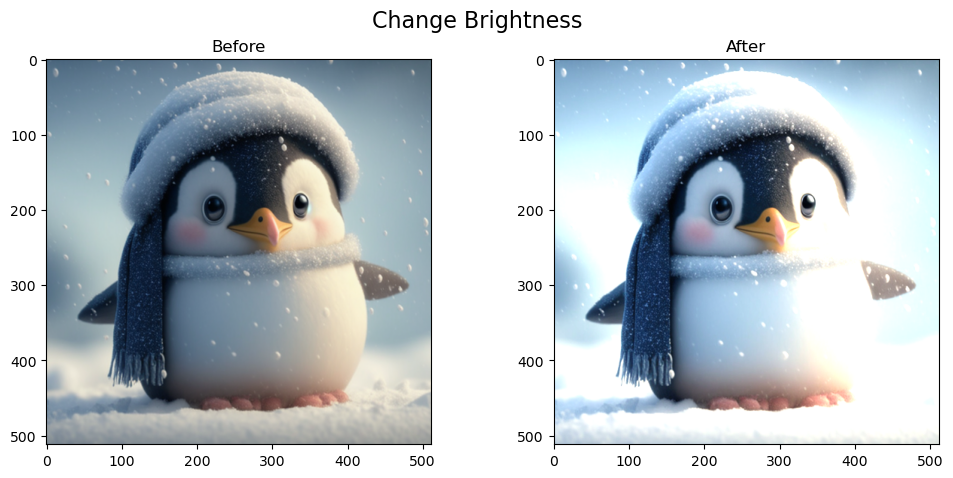

Ảnh được lưu ở output/penguin_brightness.png


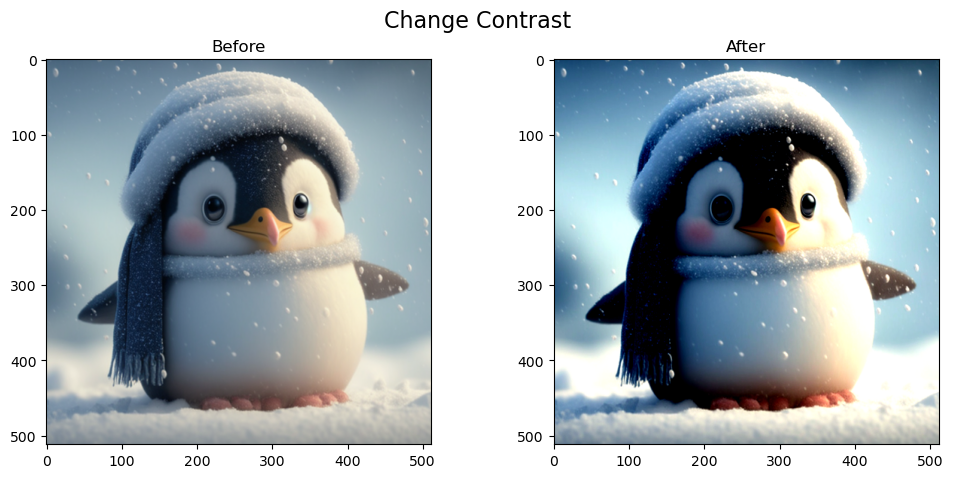

Ảnh được lưu ở output/penguin_contrast.png


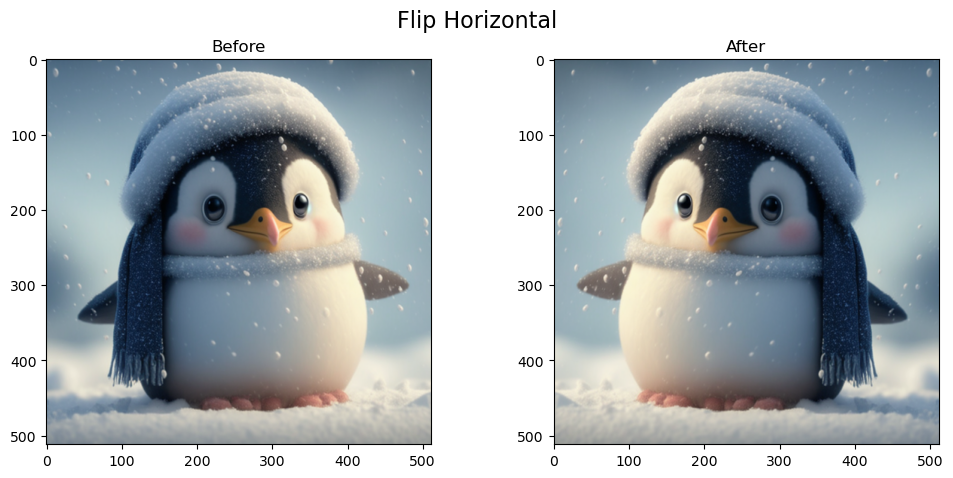

Ảnh được lưu ở output/penguin_flip_horizontal.png


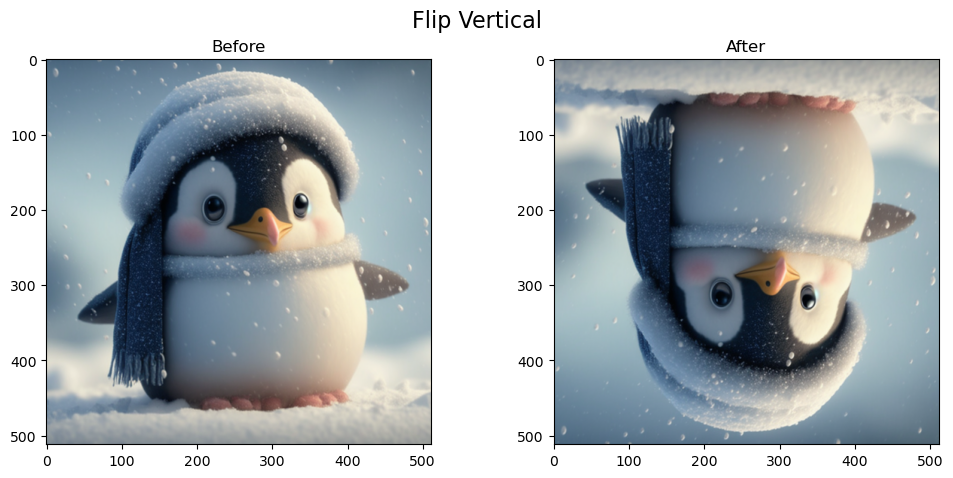

Ảnh được lưu ở output/penguin_flip_vertical.png


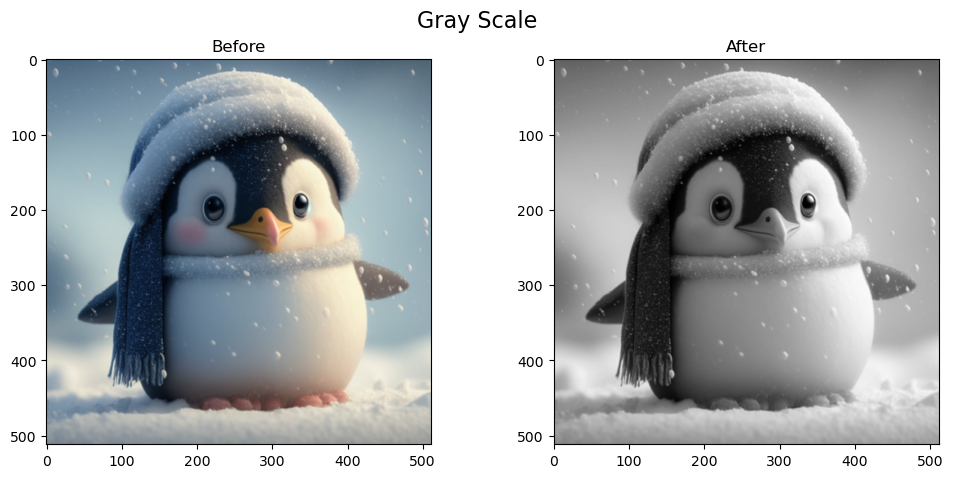

Ảnh được lưu ở output/penguin_grayscale.png


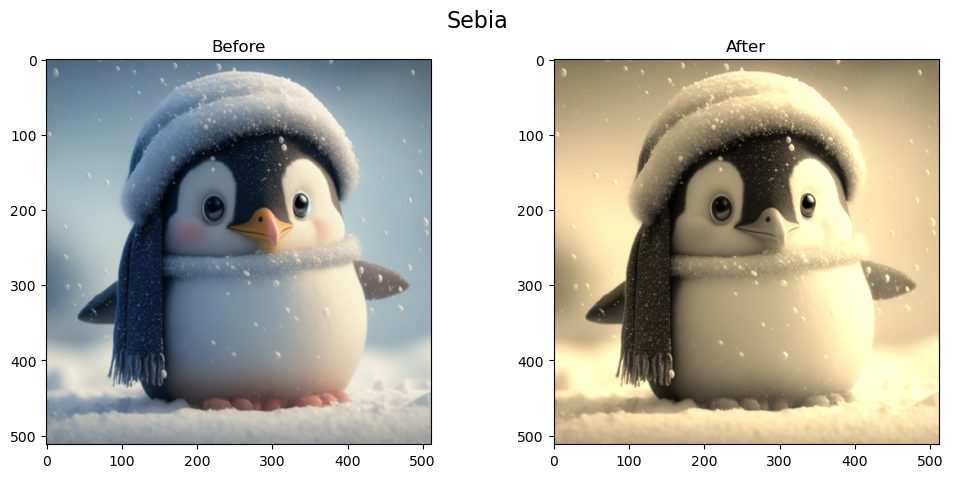

Ảnh được lưu ở output/penguin_sebia.png


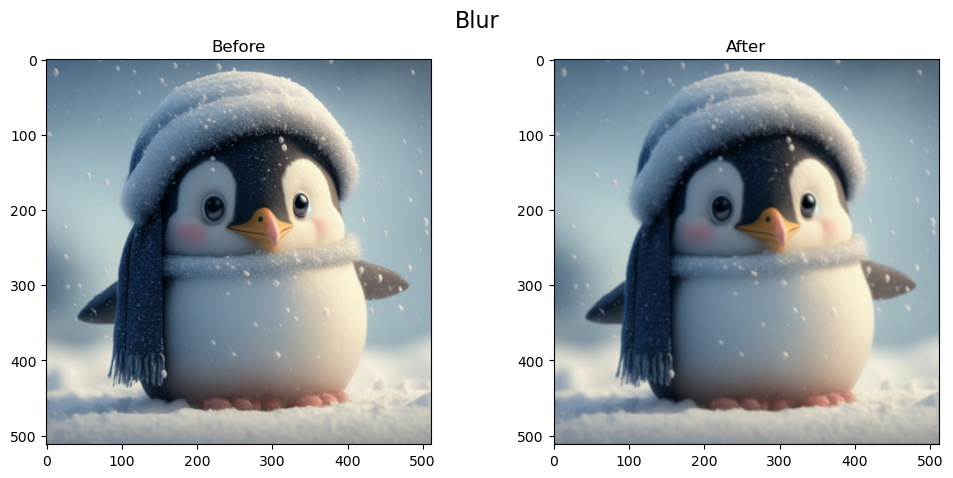

Ảnh được lưu ở output/penguin_blur.png


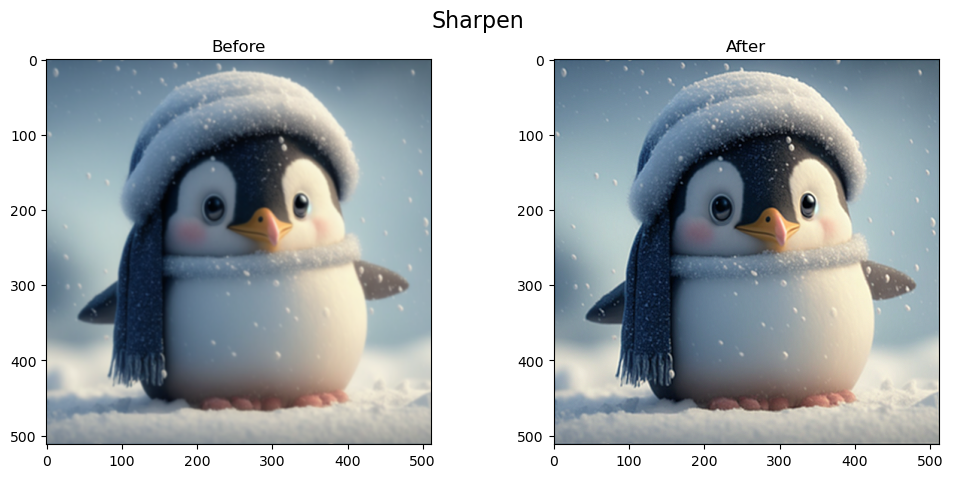

Ảnh được lưu ở output/penguin_sharpen.png


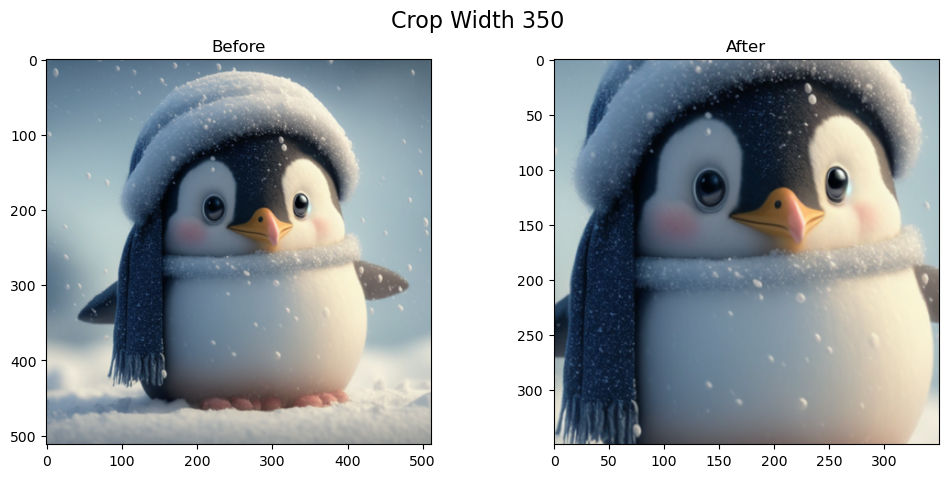

Ảnh được lưu ở output/penguin_crop_350.png


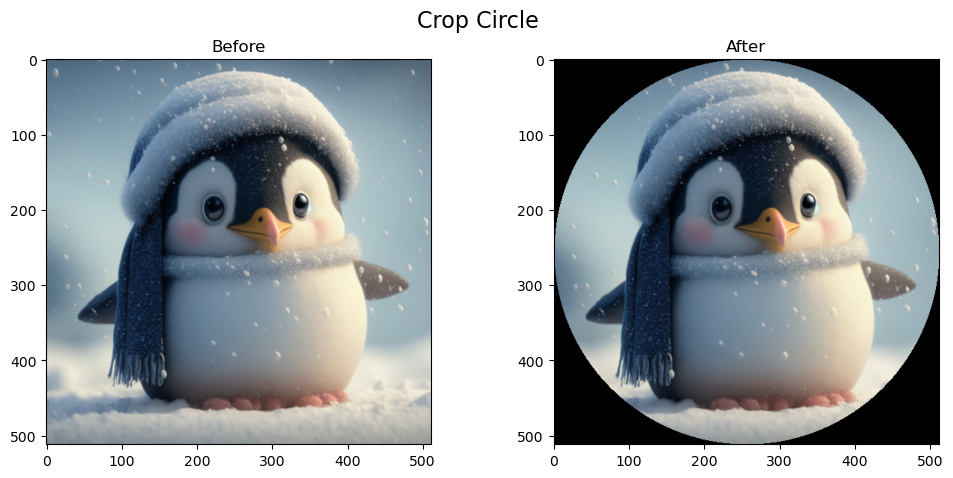

Ảnh được lưu ở output/penguin_crop_circle.png


In [90]:
if __name__ == "__main__":
    img_path = input("Nhập vào đường dẫn ảnh (vd: penguin.png): ")
    try:
        choice = int(input("""\nNhập lựa chọn: 
                            \n 0. Chạy tất cả chức năng
                            \n 1. Thay đổi độ sáng cho ảnh
                            \n 2. Thay đổi độ tương phản
                            \n 3. Lật ảnh (ngang - dọc)
                            \n 4. Chuyển đổi ảnh RGB thành ảnh xám/sepia
                            \n 5. Làm mờ/sắc nét ảnh
                            \n 6. Cắt ảnh theo kích thước (cắt ở trung tâm)
                            \n 7. Cắt ảnh theo khung hình tròn
                            \n 8. Cắt ảnh theo 2 hình ellipse chéo nhau
                            \n Lựa chọn: """))
        
        if choice == 0:
            change_brightness(img_path)
            change_contrast(img_path)
            flip_image(img_path, enable_choice=False)
            gray_scale_image(img_path)
            sebia_image(img_path)
            blur_image(img_path)
            sharpen_image(img_path)
            crop_image_width(img_path, 350)    
            crop_image_circle(img_path)
        elif choice == 1:
            change_brightness(img_path)
        elif choice == 2:
            change_contrast(img_path)
        elif choice == 3:
            flip_image(img_path)
        elif choice == 4:
            gray_scale_image(img_path)
            sebia_image(img_path)
        elif choice == 5:
            blur_image(img_path)
            sharpen_image(img_path)
        elif choice == 6:
            crop_image_width(img_path, 350)    
        elif choice == 7:
            crop_image_circle(img_path)
    except:
        raise SystemExit("Đường dẫn không hợp lệ")


##  <a class="anchor" id="c5">5. Tài liệu tham khảo</a>
+ https://dyclassroom.com/image-processing-project/how-to-convert-a-color-image-into-sepia-image
+ https://www.researchpublish.com/upload/book/Luminance%20Based%20Conversion%20of%20Gray-2149.pdf
+ https://www.geeksforgeeks.org/how-to-crop-an-image-using-the-numpy-module/